# Prevent overlapping labels in plotnine with automatic positioning

To prevent labels from overlapping on top of each other, ggplot has ggrepel, while plotnine has [adjustText](https://adjusttext.readthedocs.io/en/latest/).

## Read in our data

In [2]:
import pandas as pd
from plotnine import *

df = pd.read_csv("countries.csv", nrows=10)
df.head(2)

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856


## The problem

We have labels that conflict with both points and other labels. They are drawn on top of each other, which isn't ideal.

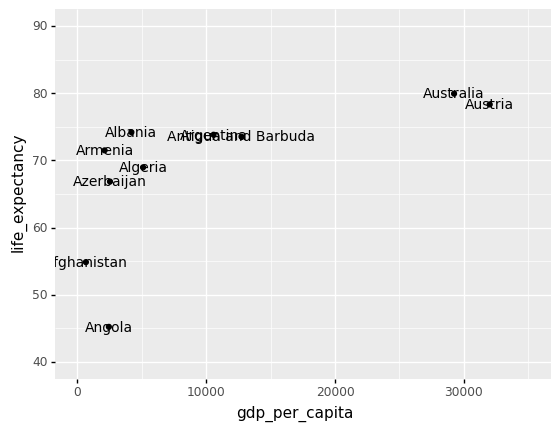

<ggplot: (312224603)>

In [3]:
(
    ggplot(df)
    + aes(x='gdp_per_capita', y='life_expectancy', label='country')
    + geom_point()
    + geom_text(size=10)
    + ylim(40, 90)
    + xlim(0, 35000)
)

## The solution

You'll need to `pip install adjustText` for this to work (and maybe restart your kernel for it to pick up the install). By passing a list of adjust_text options to `geom_text`, plotnine will reposition labels until it is "right" (and usually not overlapping).

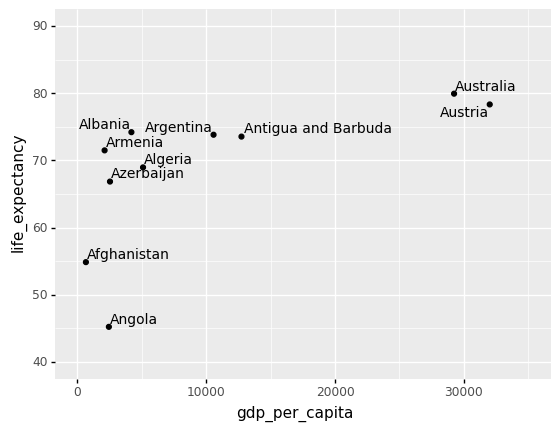

<ggplot: (315228046)>

In [21]:
# Text elements avoid each other
# Text elements avoid being drawn on top of points 
# Bounding box for text is expanded 1.1x width 1.25x height

adjust_text_options = {
    'avoid_text': True,
    'avoid_points': True,
    'expand_text': (1.1, 1.25),
}

(
    ggplot(df)
    + aes(x='gdp_per_capita', y='life_expectancy', label='country')
    + geom_point()
    + geom_text(adjust_text=adjust_text_options, size=10)
    + ylim(40, 90)
    + xlim(0, 35000)
)

I honestly don't think it works very well but it's The Suggested Solution.